## Project Name - **Census Income Project**


##### Name - Aman Mulla.
##### Batch - DS2307
##### Project Type - EDA and Classification


# **Project Summary -**

This project utilizes data from the 1994 Census database, curated by Ronny Kohavi and Barry Becker, focusing on clean records meeting specific criteria (AAGE>16, AGI>100, AFNLWGT>1, HRSWK>0). The objective is predicting whether an individual earns over $50K annually. The 'fnlwgt' (final weight) represents a scaling factor aligned with the US civilian non-institutional population estimates from the Census Bureau's Current Population Survey (CPS). These weights ensure representativeness by considering state-level population estimates, Hispanic origin by age and sex, and controls based on race, age, and sex. The weighting process iterates through these controls multiple times to ensure comprehensive coverage. Essentially, it adjusts the dataset to mirror the broader population demographics, enabling fair analysis. However, the caveat lies in the variation within states due to the CPS's 51 state-specific samples. This project aims to leverage this weighted data to build a predictive model for income classification, drawing insights into socio-economic characteristics impacting earnings above or below $50K.

Varibales in Dataset:

1. **Age:** Age of individuals in years.
2. **Workclass:** Employment type—Private, Government, Self-employed, Unemployed.
3. **Fnlwgt (Final Weight):** Weight to make data representative of the population.
4. **Education:** Highest attained education—High School, Bachelor's, Masters, etc.
5. **Education_num:** Numeric representation of education level.
6. **Marital_status:** Marital status—Married, Never Married, Divorced, Widowed, etc.
7. **Occupation:** Job role—Managerial, Clerical, Technician, Service, etc.
8. **Relationship:** Family relationship—Husband, Wife, Not-in-family, Own-child, etc.
9. **Race:** Racial or ethnic background—White, Black, Asian-Pac-Islander, etc.
10. **Sex:** Gender—Male or Female.
11. **Capital_gain:** Profits from investments or asset sales.
12. **Capital_loss:** Losses from investments or asset sales.
13. **Hours_per_week:** Hours worked per week in the primary job.
14. **Native_country:** Country of origin or nationality.
15. **Income:** Target variable—<=50K (lower income) or >50K (higher income).

# **Problem Statement**

**The challenge is to construct a predictive model using demographic and socio-economic attributes to determine whether individuals earn over $50K annually. Leveraging attributes like age, education, occupation, and work class, the objective is to classify individuals into two income groups: <=50K or >50K. The dataset's features encompass diverse aspects of an individual's life, including their employment status, education level, marital status, and more. The goal is to create a robust prediction system that accurately categorizes individuals based on income, providing insights into the factors influencing higher earnings. This entails exploring correlations between various attributes and income levels, ultimately enabling the development of a model that can generalize and predict income brackets effectively for individuals based on their socio-demographic characteristics.**

**Feature:** Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country

**Target:** Income

## Knowing data and variable in dataset

In [91]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [92]:
census_data = pd.read_csv('/content/drive/MyDrive/DataSets/census_income.csv')

census_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**All column Names found without any space, will be no any type error**

## ***1. Know Your Data***

### Dataset Rows & Columns count

In [93]:
# Will Check for shape of dataset

census_data.shape

(32560, 15)

**Given dataset contain 32560 rows and 15 columns**

### Dataset Information

In [94]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Dataset Information:**

* Age' represents the age of individuals.
* 'Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', and 'Native_country' seem to be categorical features describing work, education, marital status, occupation, relationships, race, sex, and native country respectively.
* 'Fnlwgt' and 'Education_num' could be specific identifiers or numeric features related to education and weight.

#### Null Values/ Duplicate Values

In [95]:
# Will Chek for duplicate values

census_data.duplicated().sum()

# 24 duplicate values present in dataset, will drop from dataset

census_data.drop_duplicates(keep = 'first', inplace = True)

# Will check again for duplicate
census_data.duplicated().sum()


0

In [96]:
# Null Values

census_data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

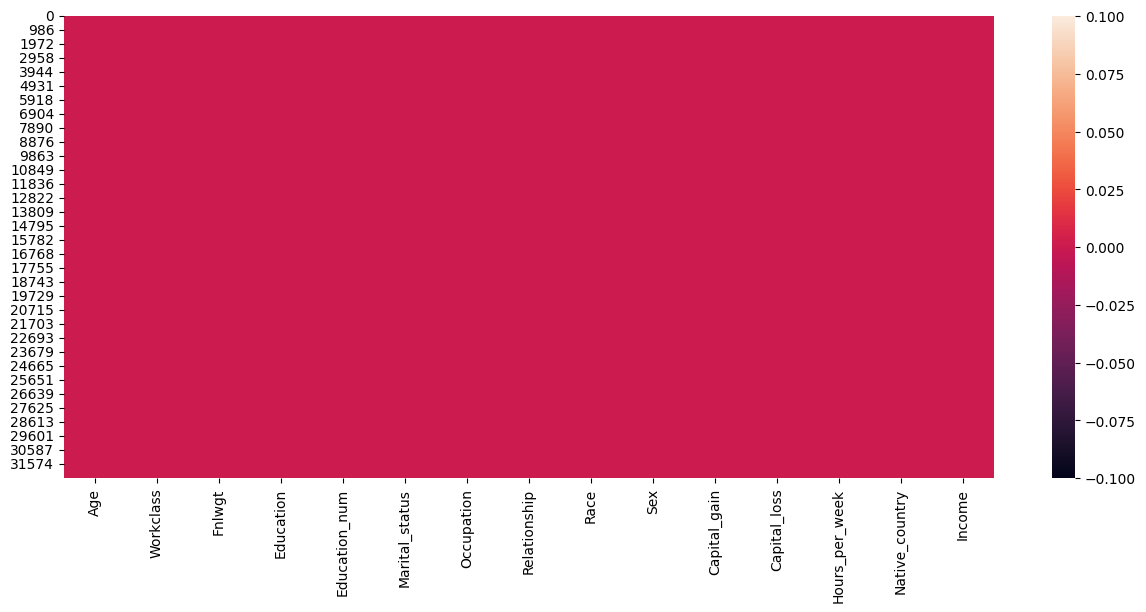

In [97]:
plt.figure(figsize=(15,6))

sns.heatmap(census_data.isnull())

In [98]:
census_data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

**Unique Values in Dataset:**

Age: 73 unique values (Age).

Workclass: 8 unique values (Workclass).

Fnlwgt: 21647 unique values (Fnlwgt).

Education: 16 unique values (Education).

Education_num: 16 unique values (Education_num).

Marital_status: 7 unique values (Marital_status).

Occupation: 14 unique values (Occupation).

Relationship: 6 unique values (Relationship).

Race: 5 unique values (Race).

Sex: 2 unique values (Sex).

Capital_gain: 119 unique values (Capital_gain).

Capital_loss: 92 unique values (Capital_loss).

Hours_per_week: 94 unique values (Hours_per_week).

Native_country: 41 unique values (Native_country).

Income: 2 unique values (Income).

**Description of dataset:**

In [99]:
census_data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* Age:

  Ranges from 17 to 90 years, with a mean of approximately 38.6 years.
  Majority of individuals (50%) fall between 28 to 48 years, with the middle 50% spanning this range.
  The spread of ages has a moderate standard deviation of about 13.64 years.

* Fnlwgt (Final Weight):

  Ranges from 12,285 to 1,484,705, with a mean value around 189,781.8.
  The values are quite dispersed, indicated by a large standard deviation of approximately 105,549.8.
* Education_num:

  Ranges from 1 to 16, with a mean value around 10.08.
  The majority of individuals have education numbers (years of education) between 9 to 12, representing the middle 50%.

* Capital_gain & Capital_loss:

  Capital_gain: Ranges from 0 to 99,999, with an average of 1,077.6.
  Capital_loss: Spans from 0 to 4,356, with an average loss of 87.3.
  Both features have a significant number of zero values (minimum and 25th percentile), suggesting many individuals haven't experienced capital gains or losses.

* Hours_per_week:

   Ranges from 1 to 99 hours, with an average of 40.44 hours per week.
   Most individuals work around 40 hours per week, as seen in both the median (50th percentile) and the 25th/75th percentile values.

In [100]:
# Willseperate for numerical and categerica column frommail dataset

categorical_columns = []
numerical_columns = []

for i in census_data.columns:
  if census_data[i].dtypes == 'object':
    categorical_columns.append(i)
  elif census_data[i].dtypes =='float64' or census_data[i].dtypes =='int64':
    numerical_columns.append(i)


print(categorical_columns)
print(numerical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [101]:
# Display unique values present inside each categorical column

for i in categorical_columns:
    print(i, ":")
    print(census_data[i].unique())
    print("\n")

Workclass :
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Education :
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Marital_status :
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation :
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']


Relationship :
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Race :
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


Sex :
[' Male' ' Female']


Native_country :
[' United-States

**From unique values of each categorical columns, we can observe that having "?" in columns like "Occupation", "Workclass" and "Native_country". As it will not gives correct information about dataset hence will replace this "?" with mode of respective column.**

In [102]:
# First will replace "?" with NaN and then fill with mode of respective column

census_data['Workclass'].replace(' ?', pd.NA, inplace=True)
census_data['Occupation'].replace(' ?', pd.NA, inplace=True)
census_data['Native_country'].replace(' ?', pd.NA, inplace=True)

In [103]:
# Fill NaNs with mode
census_data['Occupation'].fillna(census_data['Occupation'].mode()[0], inplace=True)
census_data['Workclass'].fillna(census_data['Workclass'].mode()[0], inplace=True)
census_data['Native_country'].fillna(census_data['Native_country'].mode()[0], inplace=True)

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

### **Age Distribution**

Text(0, 0.5, 'Frequency')

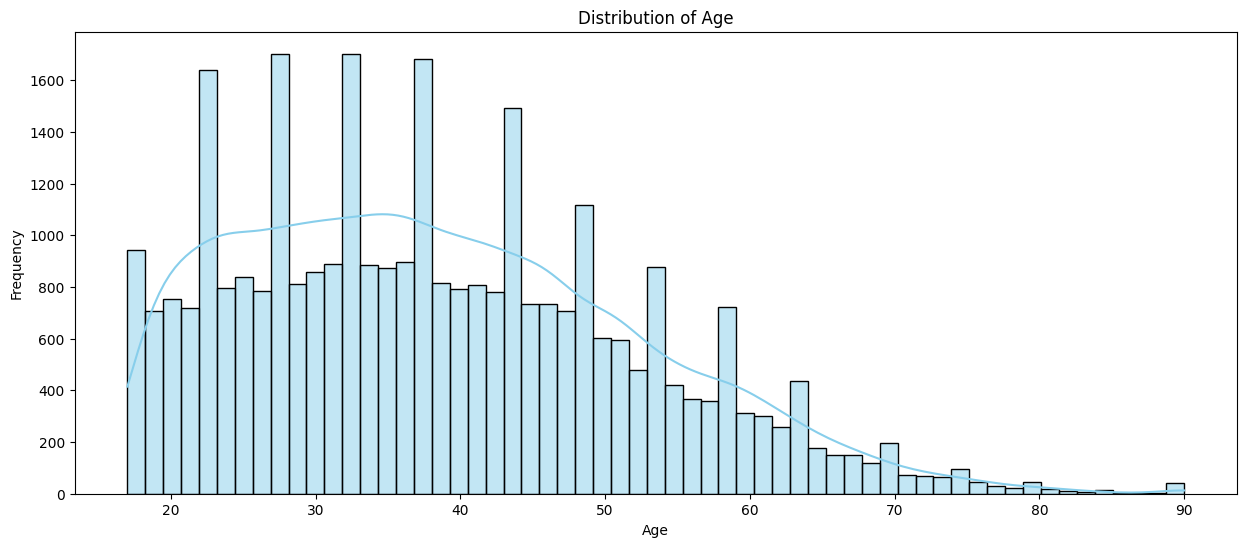

In [104]:
age_distri = census_data['Age']

age_distri

# Create distribution plots
plt.figure(figsize=(15,6))

# Distribution plot for MaxTemp
sns.histplot(census_data['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

**Insights from above chart:**
* Age Range: The majority of individuals in the dataset seem to fall within a certain range, possibly between their late 20s to mid-50s, as suggested by the peak in frequency within that range.
* The distribution appears to be somewhat skewed to the right, indicating that there might be relatively fewer individuals in the dataset at older ages beyond the mid-50s or 60s.

#### Chart - 2

### **Education Level Distribution**

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


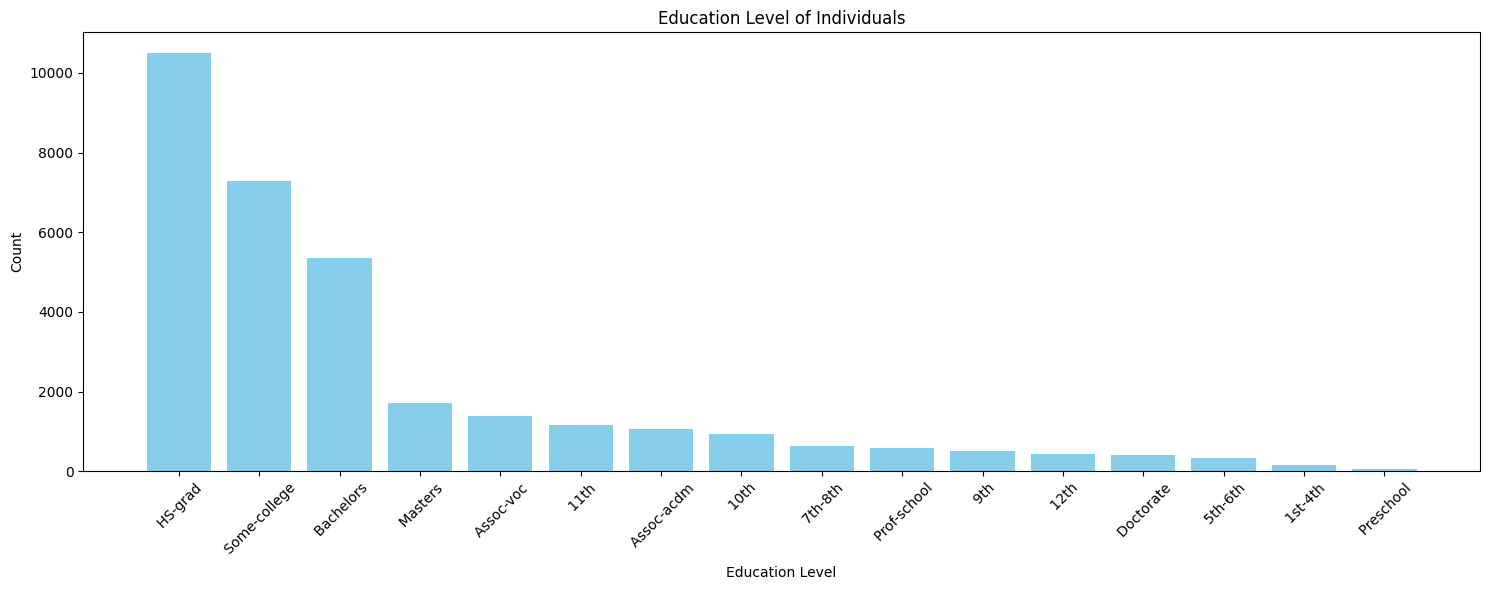

In [105]:
edu_level = census_data['Education']

edu_count = edu_level.value_counts()

print(edu_count)

plt.figure(figsize=(15, 6))
plt.bar(edu_count.index, edu_count.values, color='skyblue')
plt.title('Education Level of Individuals')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights from above chart:**
* Education Distribution: The majority of individuals fall into categories like 'HS-grad' (High School Graduates) and 'Some-college', indicating a significant portion of the dataset comprises individuals with high school education or some college experience.
* There's a descending trend in counts as the education level progresses beyond high school. 'Bachelors', 'Masters', 'Assoc-voc', and 'Assoc-acdm' categories show decreasing counts, suggesting a lower prevalence of these higher educational achievements in the dataset.
* Categories like 'Preschool', '1st-4th', '5th-6th', and '7th-8th' have notably lower counts, signifying a smaller representation of individuals with education levels below high school.
* 'Prof-school' and 'Doctorate' categories exhibit lower counts compared to bachelor's and high school graduates, indicating a smaller population with professional or doctoral degrees in the dataset.
* 'Preschool' has the fewest individuals, suggesting a very small number of individuals in the dataset with education limited to preschool.

#### Chart - 3

### **Occupation Distribution**

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


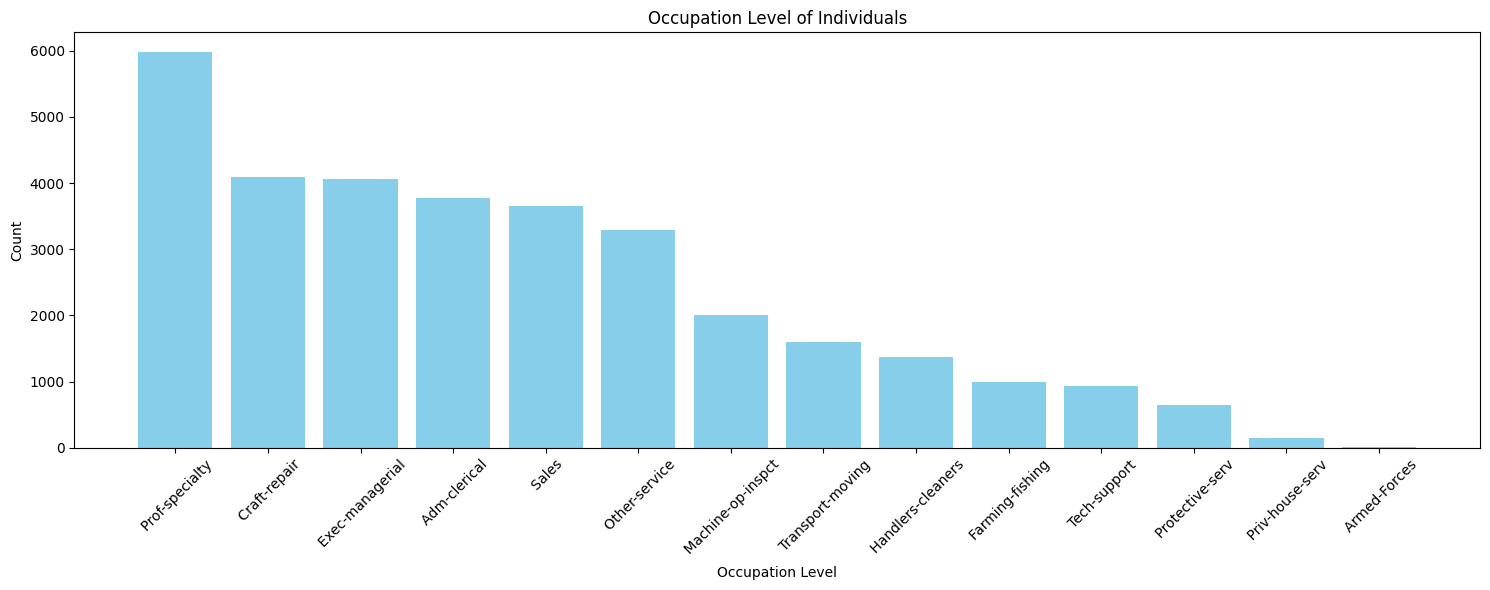

In [106]:
occu_level = census_data['Occupation']

occu_count = occu_level.value_counts()

print(occu_count)


plt.figure(figsize=(15, 6))
plt.bar(occu_count.index, occu_count.values, color='skyblue')
plt.title('Occupation Level of Individuals')
plt.xlabel('Occupation Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights from above chart:**

* The most prevalent occupations include "Prof-specialty," "Craft-repair," and "Exec-managerial," showcasing a higher number of individuals within these roles.
* Occupations like "Adm-clerical," "Sales," and "Other-service" also have substantial representation, indicating a significant portion of individuals engaged in administrative, sales, or general service-oriented positions.
* Roles such as "Machine-op-inspct," "Transport-moving," and "Handlers-cleaners" demonstrate a moderate count, suggesting involvement in skilled trades, transportation, or manual labor.
* Some occupations have lower counts, like "Farming-fishing," "Tech-support," "Protective-serv," "Priv-house-serv," and "Armed-Forces," indicating fewer individuals in these specific job categories.

#### Chart - 4

### **Workclass Distribution**

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


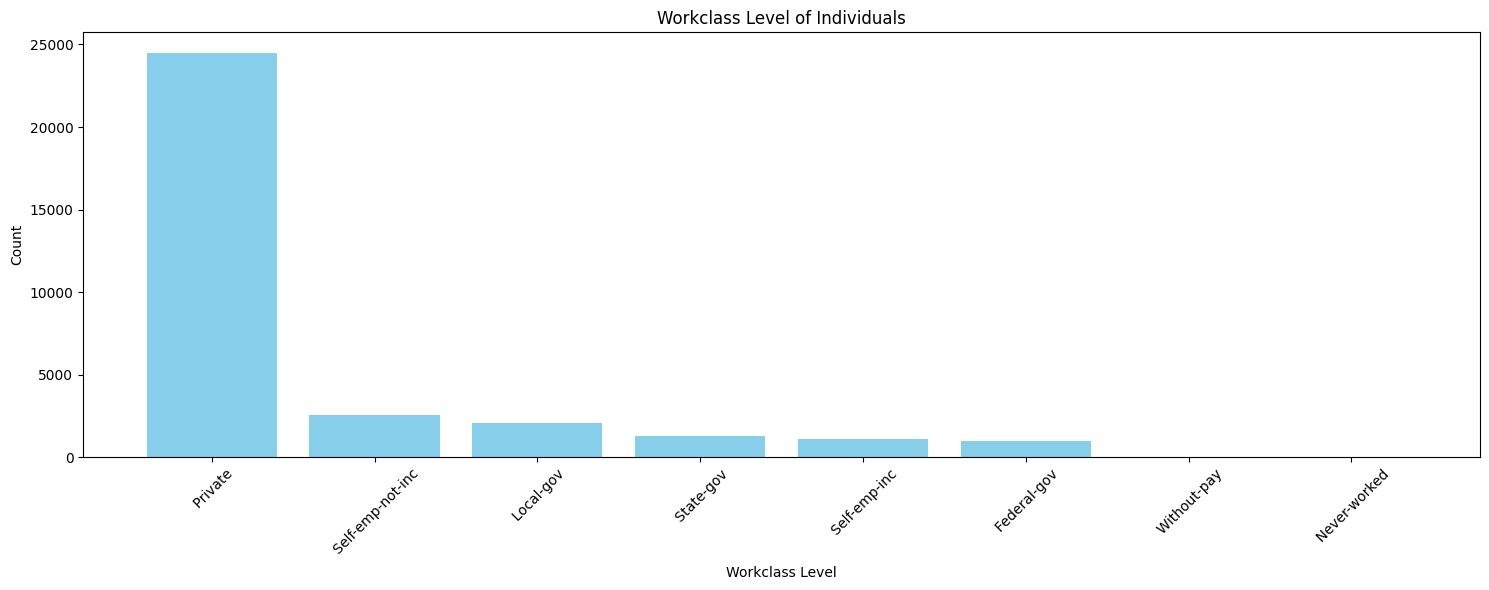

In [107]:
work_level = census_data['Workclass']

work_count = work_level.value_counts()

print(work_count)


plt.figure(figsize=(15, 6))
plt.bar(work_count.index, work_count.values, color='skyblue')
plt.title('Workclass Level of Individuals')
plt.xlabel('Workclass Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights from above chart:**
* The largest segment consists of individuals employed in the private sector, with over 22,000 individuals, indicating a significant presence in the dataset.
* "Self-emp-not-inc" has a higher count compared to "Self-emp-inc," suggesting more individuals are self-employed without incorporation.
*  Various levels of government employment, including "Local-gov," "State-gov," and "Federal-gov," collectively represent a substantial portion, though individually smaller than private employment.
*  "Without-pay" and "Never-worked" have very few individuals

In [108]:
census_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

#### Chart - 4

### **Income by Workclass**

Text(0.5, 0, 'Workclass')

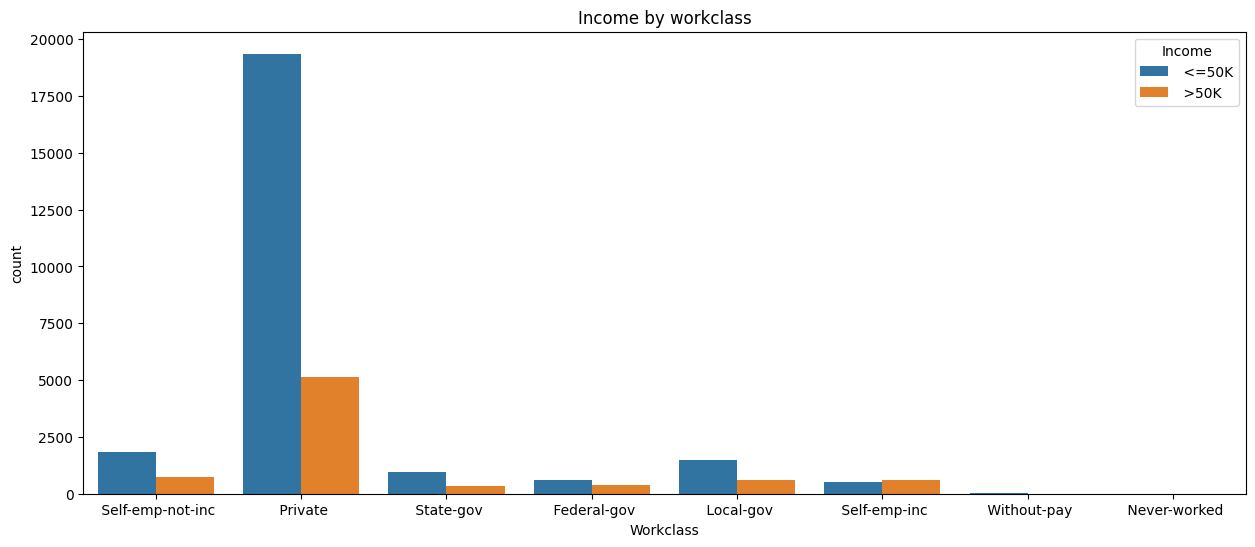

In [109]:

plt.figure(figsize=(15, 6))
sns.countplot(x = 'Workclass', hue = 'Income', data = census_data)
plt.title("Income by workclass")
plt.xlabel('Workclass')

**'Private' workclass has the most individuals, with a mix of income levels. 'Self-emp-inc' has a balanced distribution, while 'Without-pay' has fewer individuals.**

#### Chart - 4

### **Income by Education**

Text(0.5, 0, 'Education')

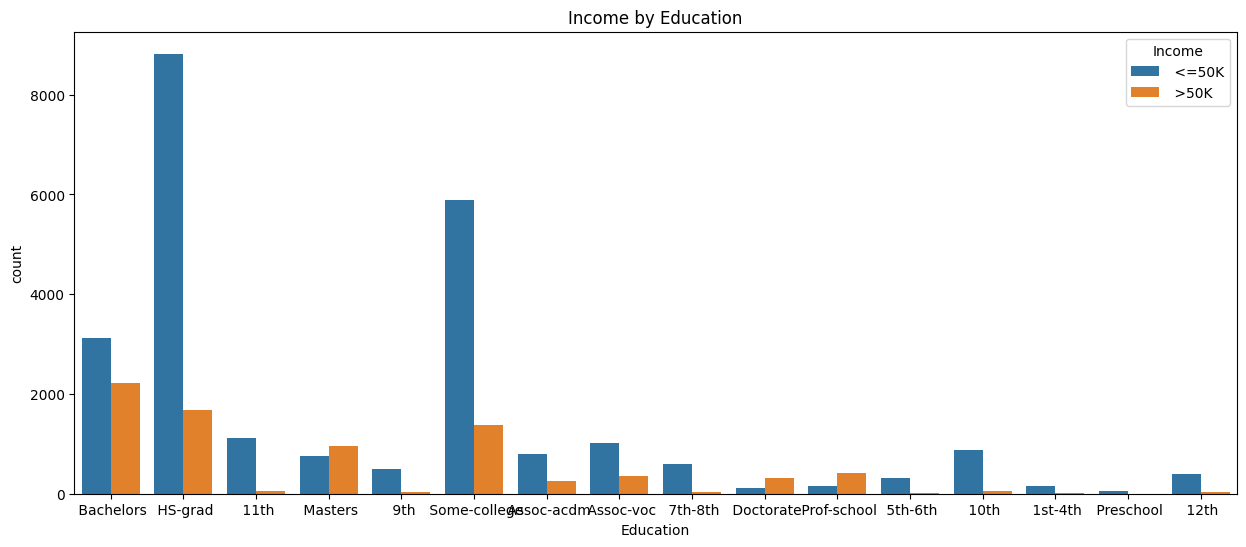

In [110]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Education', hue = 'Income', data = census_data)
plt.title("Income by Education")
plt.xlabel('Education')

**'HS-grad' dominates, with varied income distributions. 'Doctorate,' 'Masters,' and 'Prof-school' have higher >50K earners.**

#### Chart - 4

### **Income by Marital_status**

Text(0.5, 0, 'Marital_status')

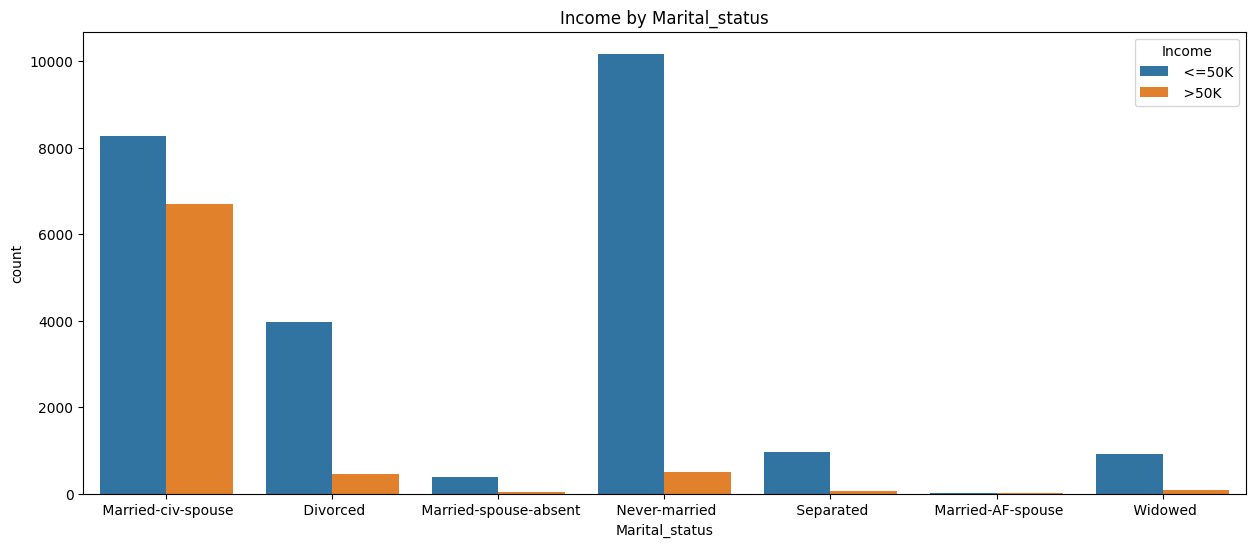

In [111]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Marital_status', hue = 'Income', data = census_data)
plt.title("Income by Marital_status")
plt.xlabel('Marital_status')

**'Married-civ-spouse' is balanced, while 'Never-married' leans towards <=50K. 'Divorced' and 'Separated' have more <=50K earners.**

#### Chart - 4

### **Income by Gender**

Text(0.5, 0, 'Sex')

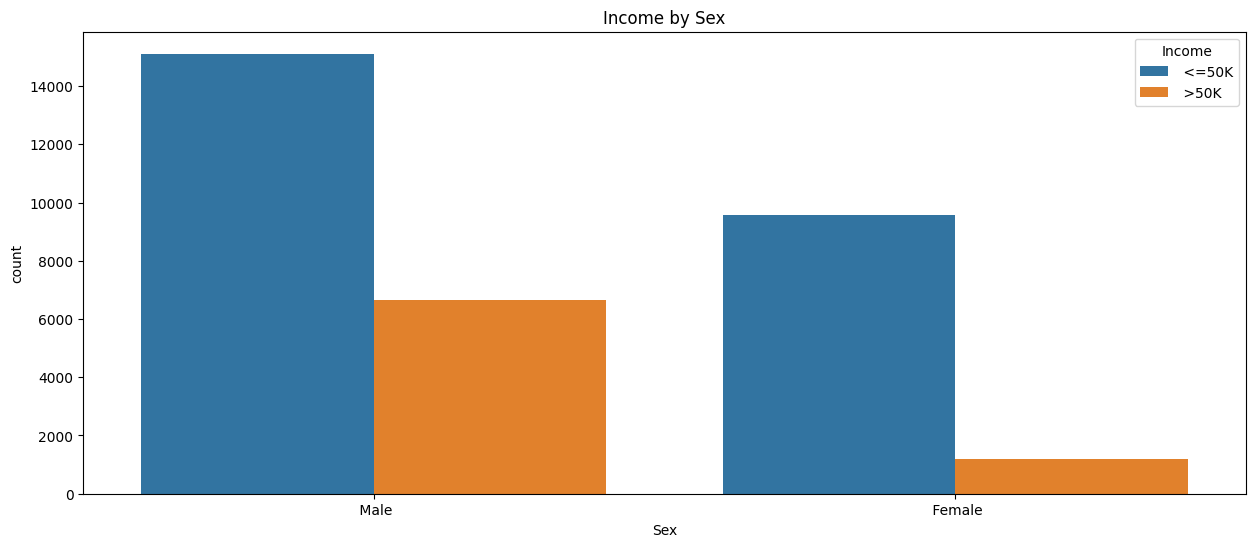

In [112]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Sex', hue = 'Income', data = census_data)
plt.title("Income by Sex")
plt.xlabel('Sex')

**'Male' is balanced. 'Female' has more individuals earning <=50K.**

#### Chart - 4

### **Workclass vs Hours per week**

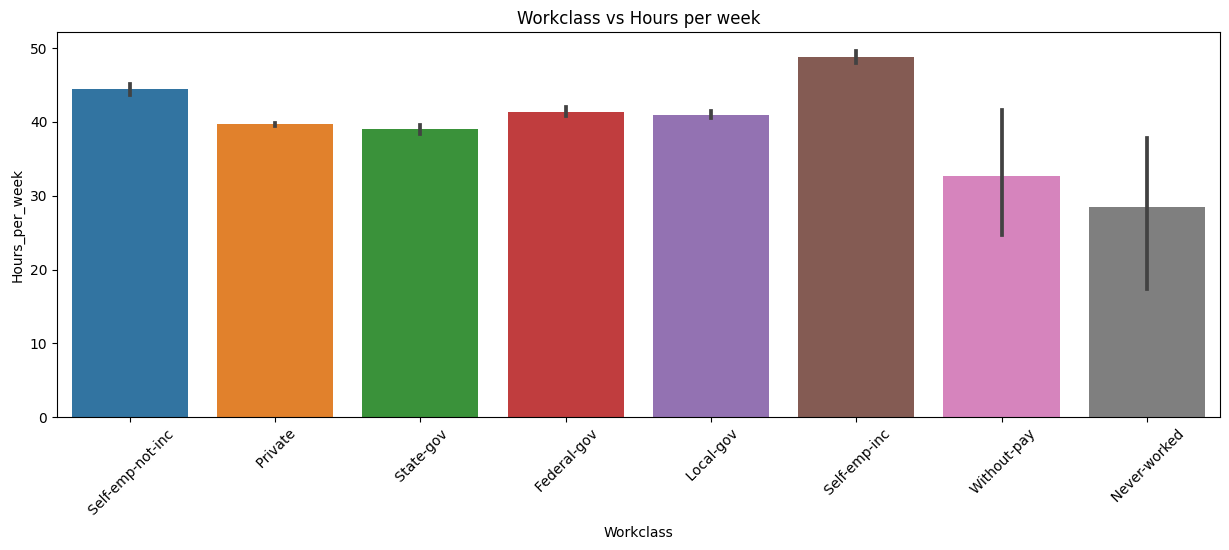

In [113]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Workclass', y = 'Hours_per_week', data = census_data)
plt.title("Workclass vs Hours per week")
plt.xticks(rotation = 45)
plt.show()

**Insights from above chart:**
* 'Private' Workclass: Shows a tendency to work more hours, suggesting a potential culture of longer work hours or a higher incidence of full-time employment within this sector.
* Government-Related Workclasses ('Federal-gov', 'Local-gov', 'State-gov'): Typically exhibit fewer working hours, aligning with standard government job structures that often follow fixed schedules or regulations regarding working hours.
* Self-Employment Categories ('Self-emp-inc', 'Self-emp-not-inc'): Display variable work hours, reflecting the flexibility that comes with self-employment.
* 'Never-worked' and 'Without-pay' Workclasses: Show very few hours or no working hours at all, suggesting limited or unpaid employment within these categories.

#### Chart - 4

### **Workclass vs Capital_gain Vs Capital_loss**

In [114]:
census_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<ipython-input-115-f07384c01d9c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Workclass', y='Capital_gain', data=census_data, ci=None, color='skyblue')
<ipython-input-115-f07384c01d9c>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Workclass', y='Capital_loss', data=census_data, ci=None, color='salmon')


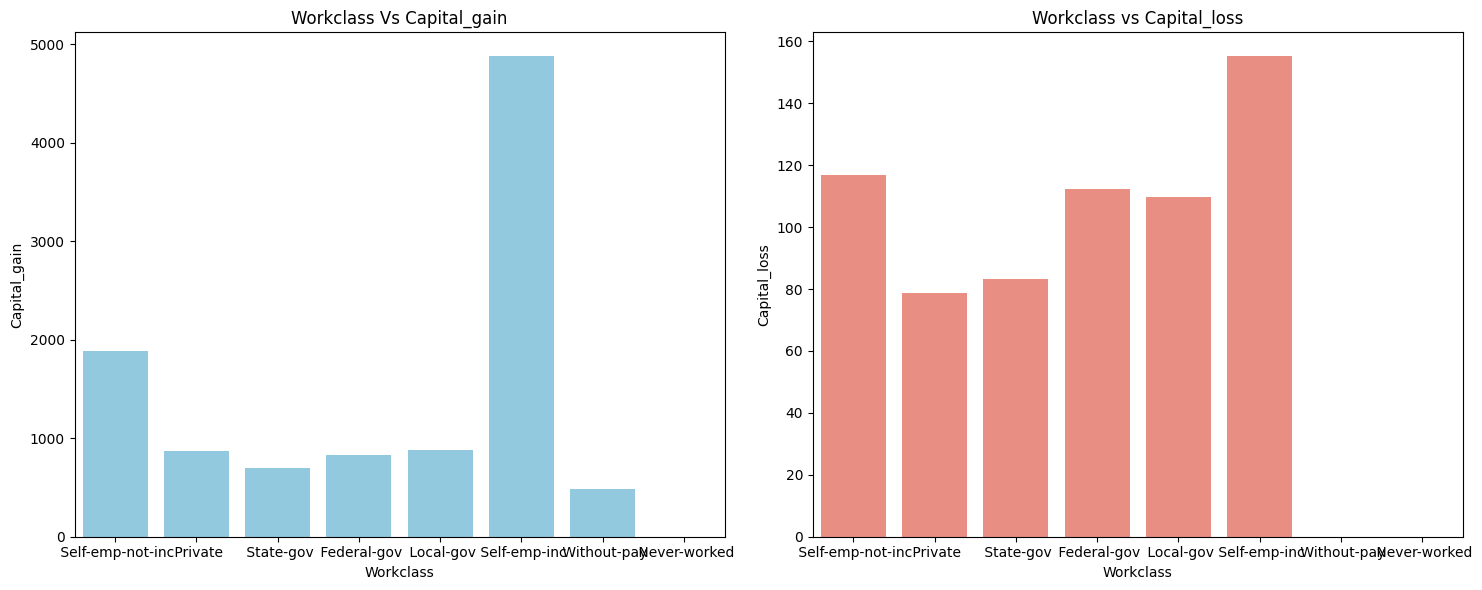

In [115]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Workclass', y='Capital_gain', data=census_data, ci=None, color='skyblue')
plt.title('Workclass Vs Capital_gain')
plt.xlabel('Workclass')
plt.ylabel('Capital_gain')

plt.subplot(1, 2, 2)
sns.barplot(x='Workclass', y='Capital_loss', data=census_data, ci=None, color='salmon')
plt.title('Workclass vs Capital_loss')
plt.xlabel('Workclass')
plt.ylabel('Capital_loss')

plt.tight_layout()
plt.show()

**Insights from above charts:**

* Capital Gain Insights by Workclass:
   
    'Private' employees exhibit higher average capital gains, indicative of diverse job types and positions within this sector contributing to increased gains.

    Workclasses related to government employment ('Federal-gov', 'Local-gov', 'State-gov') report comparatively lower capital gains, aligning with the standard structures of government jobs.

    Self-employed individuals in 'Self-emp-inc' and 'Self-emp-not-inc' display varying levels of capital gains, reflecting the diversity and versatility inherent in self-employment.

    'Never-worked' and 'Without-pay' workclasses show minimal or zero capital gains

* Capital Loss Insights by Workclass:

    'Private' employees tend to experience higher capital losses on average, potentially due to the diversity of job types and positions, leading to varied investment outcomes.

    Workclasses associated with government jobs ('Federal-gov', 'Local-gov', 'State-gov') generally report lower capital losses, reflecting more stable job structures.

    Self-employed individuals in 'Self-emp-inc' and 'Self-emp-not-inc' exhibit diverse levels of capital losses, highlighting the flexibility and variability inherent in self-employment.

     'Never-worked' and 'Without-pay' workclasses report zero capital losses.

#### Chart - 4

### **Education vs Final Weight**

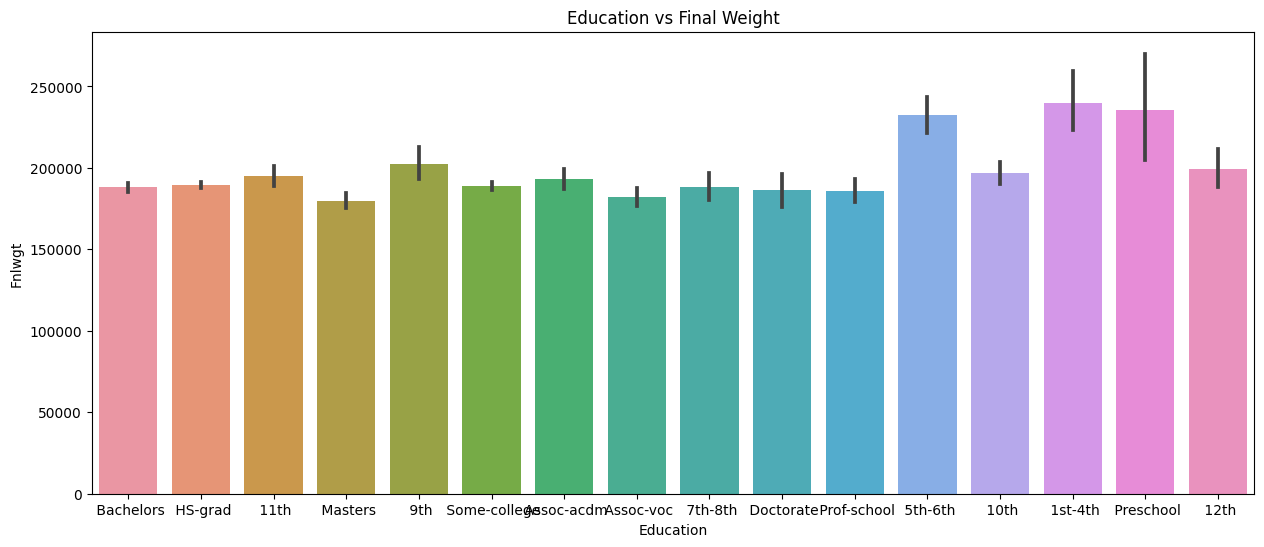

In [116]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Education', y = 'Fnlwgt', data = census_data)
plt.title("Education vs Final Weight")
plt.show()

**Insights from above chart:**
* The plot highlights 'HS-grad' as the most prevalent education level, indicating a significant portion of individuals have completed high school education.
* Following 'HS-grad', 'Some-college' emerges as the second most common education level, implying a substantial count of individuals with some college education but without a degree.
* Notable final weights for 'Bachelors' and 'Assoc-voc' suggest the presence of individuals holding bachelor's degrees and associate degrees in vocational fields, indicating a considerable portion of the dataset.
*  'Masters' and 'Assoc-acdm' categories show significant final weights, signifying individuals with postgraduate degrees and associate degrees in academic fields, respectively.
*  'Preschool' and 'Doctorate' categories exhibit considerably lower final weights, indicating a smaller population with education levels at the early (preschool) and advanced (doctorate)


#### Chart - 4

### **Native contry vs Final Weight**

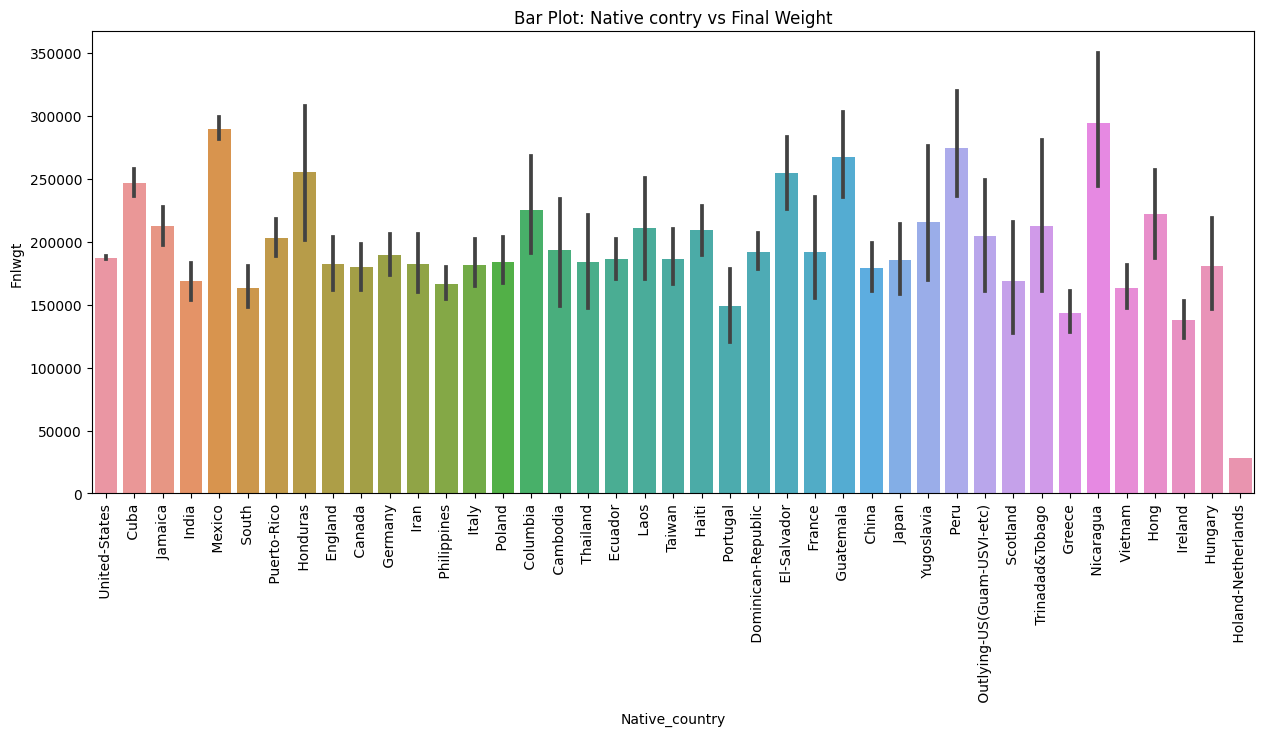

In [117]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Native_country', y = 'Fnlwgt', data = census_data)
plt.title("Bar Plot: Native contry vs Final Weight")
plt.xticks(rotation = 90)
plt.show()

**Insights from above chart:**

* United States : The 'Native_country' with the highest count, reflecting a significant population, is 'United-States.' Its substantial final weight suggests a large representation of US individuals in the dataset.
* Mexican : 'Mexico' follows 'United-States' in terms of count and final weight, indicating a substantial presence of individuals from Mexico within the dataset.
* Notable Countries: 'Canada,' 'Germany,' and 'Philippines' exhibit notable final weights, suggesting a considerable representation of individuals from these countries in the dataset.
* Low Representation: 'Holand-Netherlands' shows the lowest final weight among the listed countries, indicating a relatively smaller representation within the dataset compared to others.

#### Chart - 4

### **Income Distribution by Age and Hours per week**

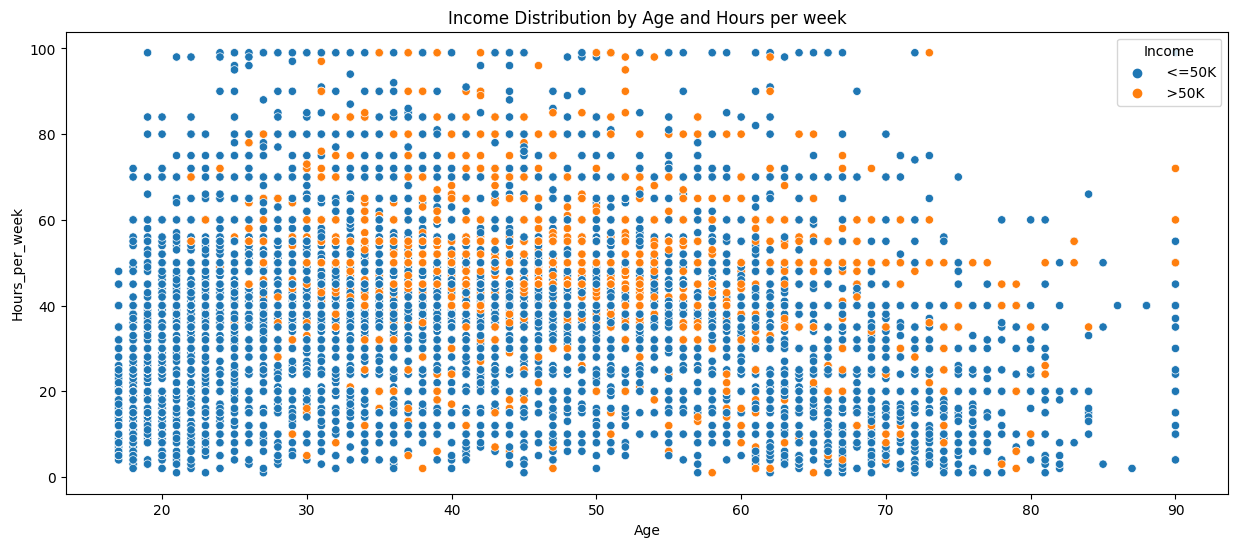

In [118]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Age', y = 'Hours_per_week', hue = 'Income', data = census_data)
plt.title("Income Distribution by Age and Hours per week")
plt.show()

**Insights from above chart:**
* This indicates within the younger demographic, both <=50K and >50K earners are distributed across a range of working hour levels.
* Despite varied working hours, younger individuals are seen to earn both <=50K and >50K incomes
* Older individuals, on the other hand, tend to work longer hours. Moreover, a notable concentration of individuals working longer hours belongs to the income bracket >50K

#### Chart - 4

### **Education Num Distribution by Income and Hours per week**

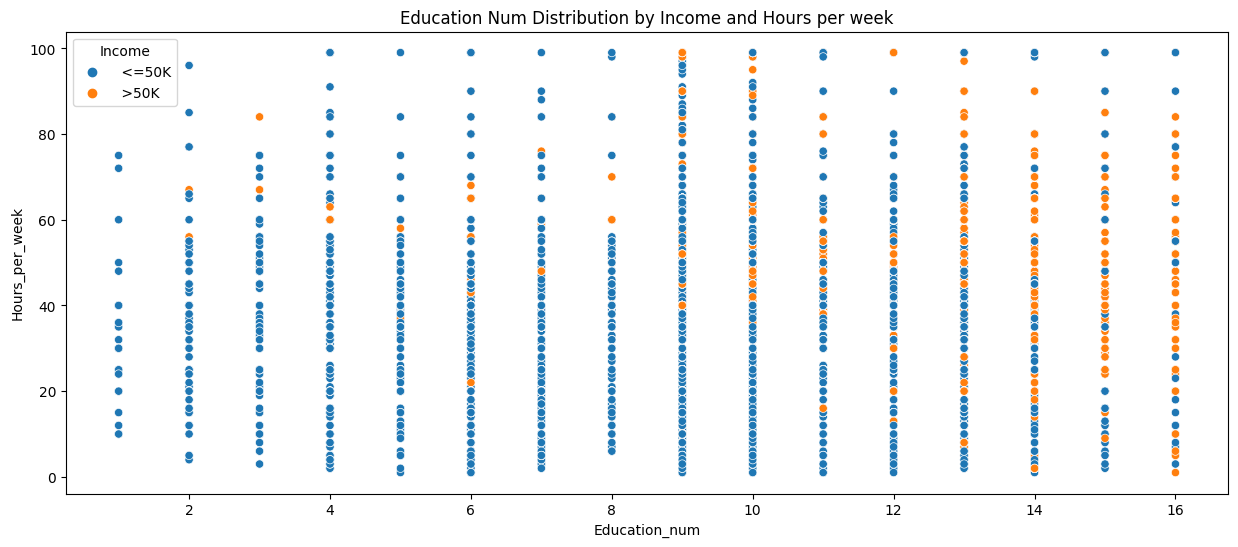

In [119]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Education_num', y = 'Hours_per_week', hue = 'Income', data = census_data)
plt.title("Education Num Distribution by Income and Hours per week")
plt.show()

**Insights from above chart:**
* Higher education levels exhibit diverse working hour distributions, showcasing individuals across both income categories (>50K and <=50K)
*  Individuals with advanced education levels demonstrate varied working hour patterns, indicating a more diverse work-life balance among this group.
* Those with lower education levels tend to work longer hours predominantly and are notably more inclined to belong to the '<=50K' income category.

### **Will Move ahead for Label Encoding**

In [120]:
census_data.head(2)

# By observing head of dataset, column like 'Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income' are categorical or object type

from sklearn.preprocessing import LabelEncoder

LabelEnco = LabelEncoder()

census_data['Workclass'] = LabelEnco.fit_transform(census_data['Workclass'])

census_data['Education'] = LabelEnco.fit_transform(census_data['Education'])

census_data['Marital_status'] = LabelEnco.fit_transform(census_data['Marital_status'])

census_data['Occupation'] = LabelEnco.fit_transform(census_data['Occupation'])

census_data['Relationship'] = LabelEnco.fit_transform(census_data['Relationship'])

census_data['Race'] = LabelEnco.fit_transform(census_data['Race'])

census_data['Sex'] = LabelEnco.fit_transform(census_data['Sex'])

census_data['Native_country'] = LabelEnco.fit_transform(census_data['Native_country'])

census_data['Income'] = LabelEnco.fit_transform(census_data['Income'])




In [121]:
census_data.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0


#### Outliers Treatment

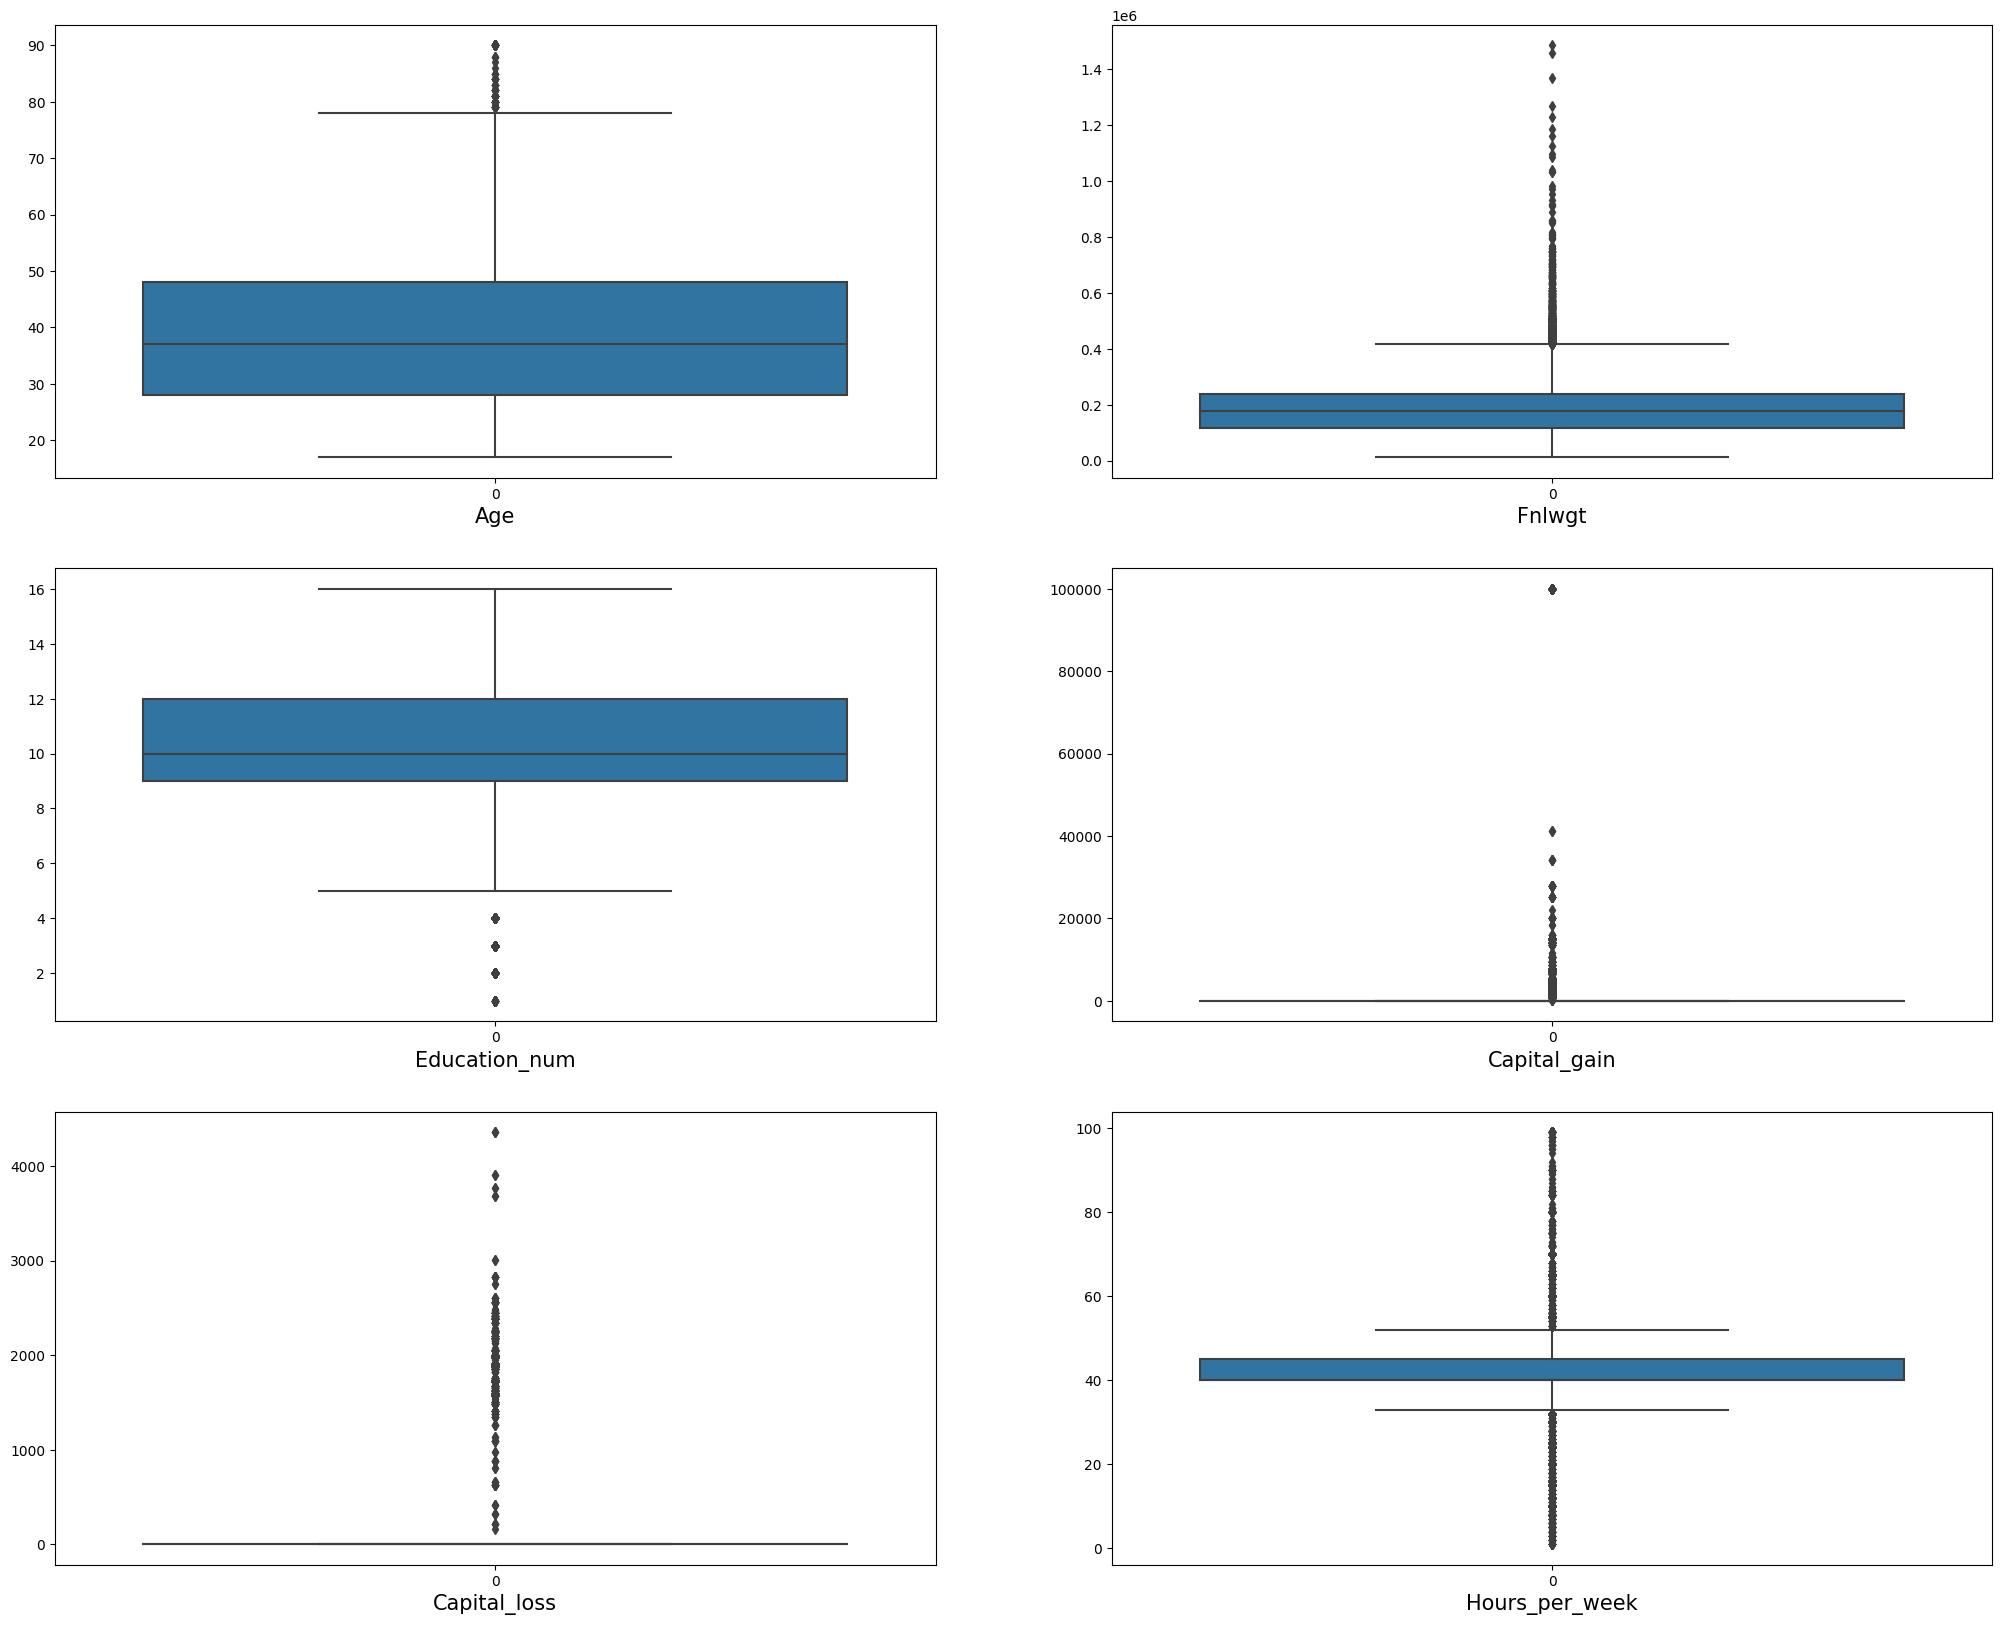

In [122]:
nums_col = census_data[['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']]

plt.figure(figsize=(25,20))
graph = 1

for column in nums_col:
  if graph<=6:
    plt.subplot(3,2,graph)
    ax=sns.boxplot(data= nums_col[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

**Outliers are present in 'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', and 'Hours_per_week' columns.**

In [123]:
# Will use z-score method for treating outliers

columns_with_outliers = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

from scipy import stats

# Define a threshold for the Z-score
z_score_threshold = 3

# Numerical columns are as defined above

# Create a copy of the dataset for outlier treatment
no_outliers = census_data.copy()

for col in columns_with_outliers:
    z_scores = stats.zscore(no_outliers[col])
    no_outliers = no_outliers[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Display the shape of the dataset after removing outliers
print("Shape of data after outlier removal:", no_outliers.shape)

Shape of data after outlier removal: (29808, 15)


#### Skewness

<ipython-input-124-85069e295861>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(nums_col[column])
<ipython-input-124-85069e295861>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(nums_col[column])
<ipython-input-124-85069e295861>:14: UserWarning: 

`distplot` is a deprecated function 

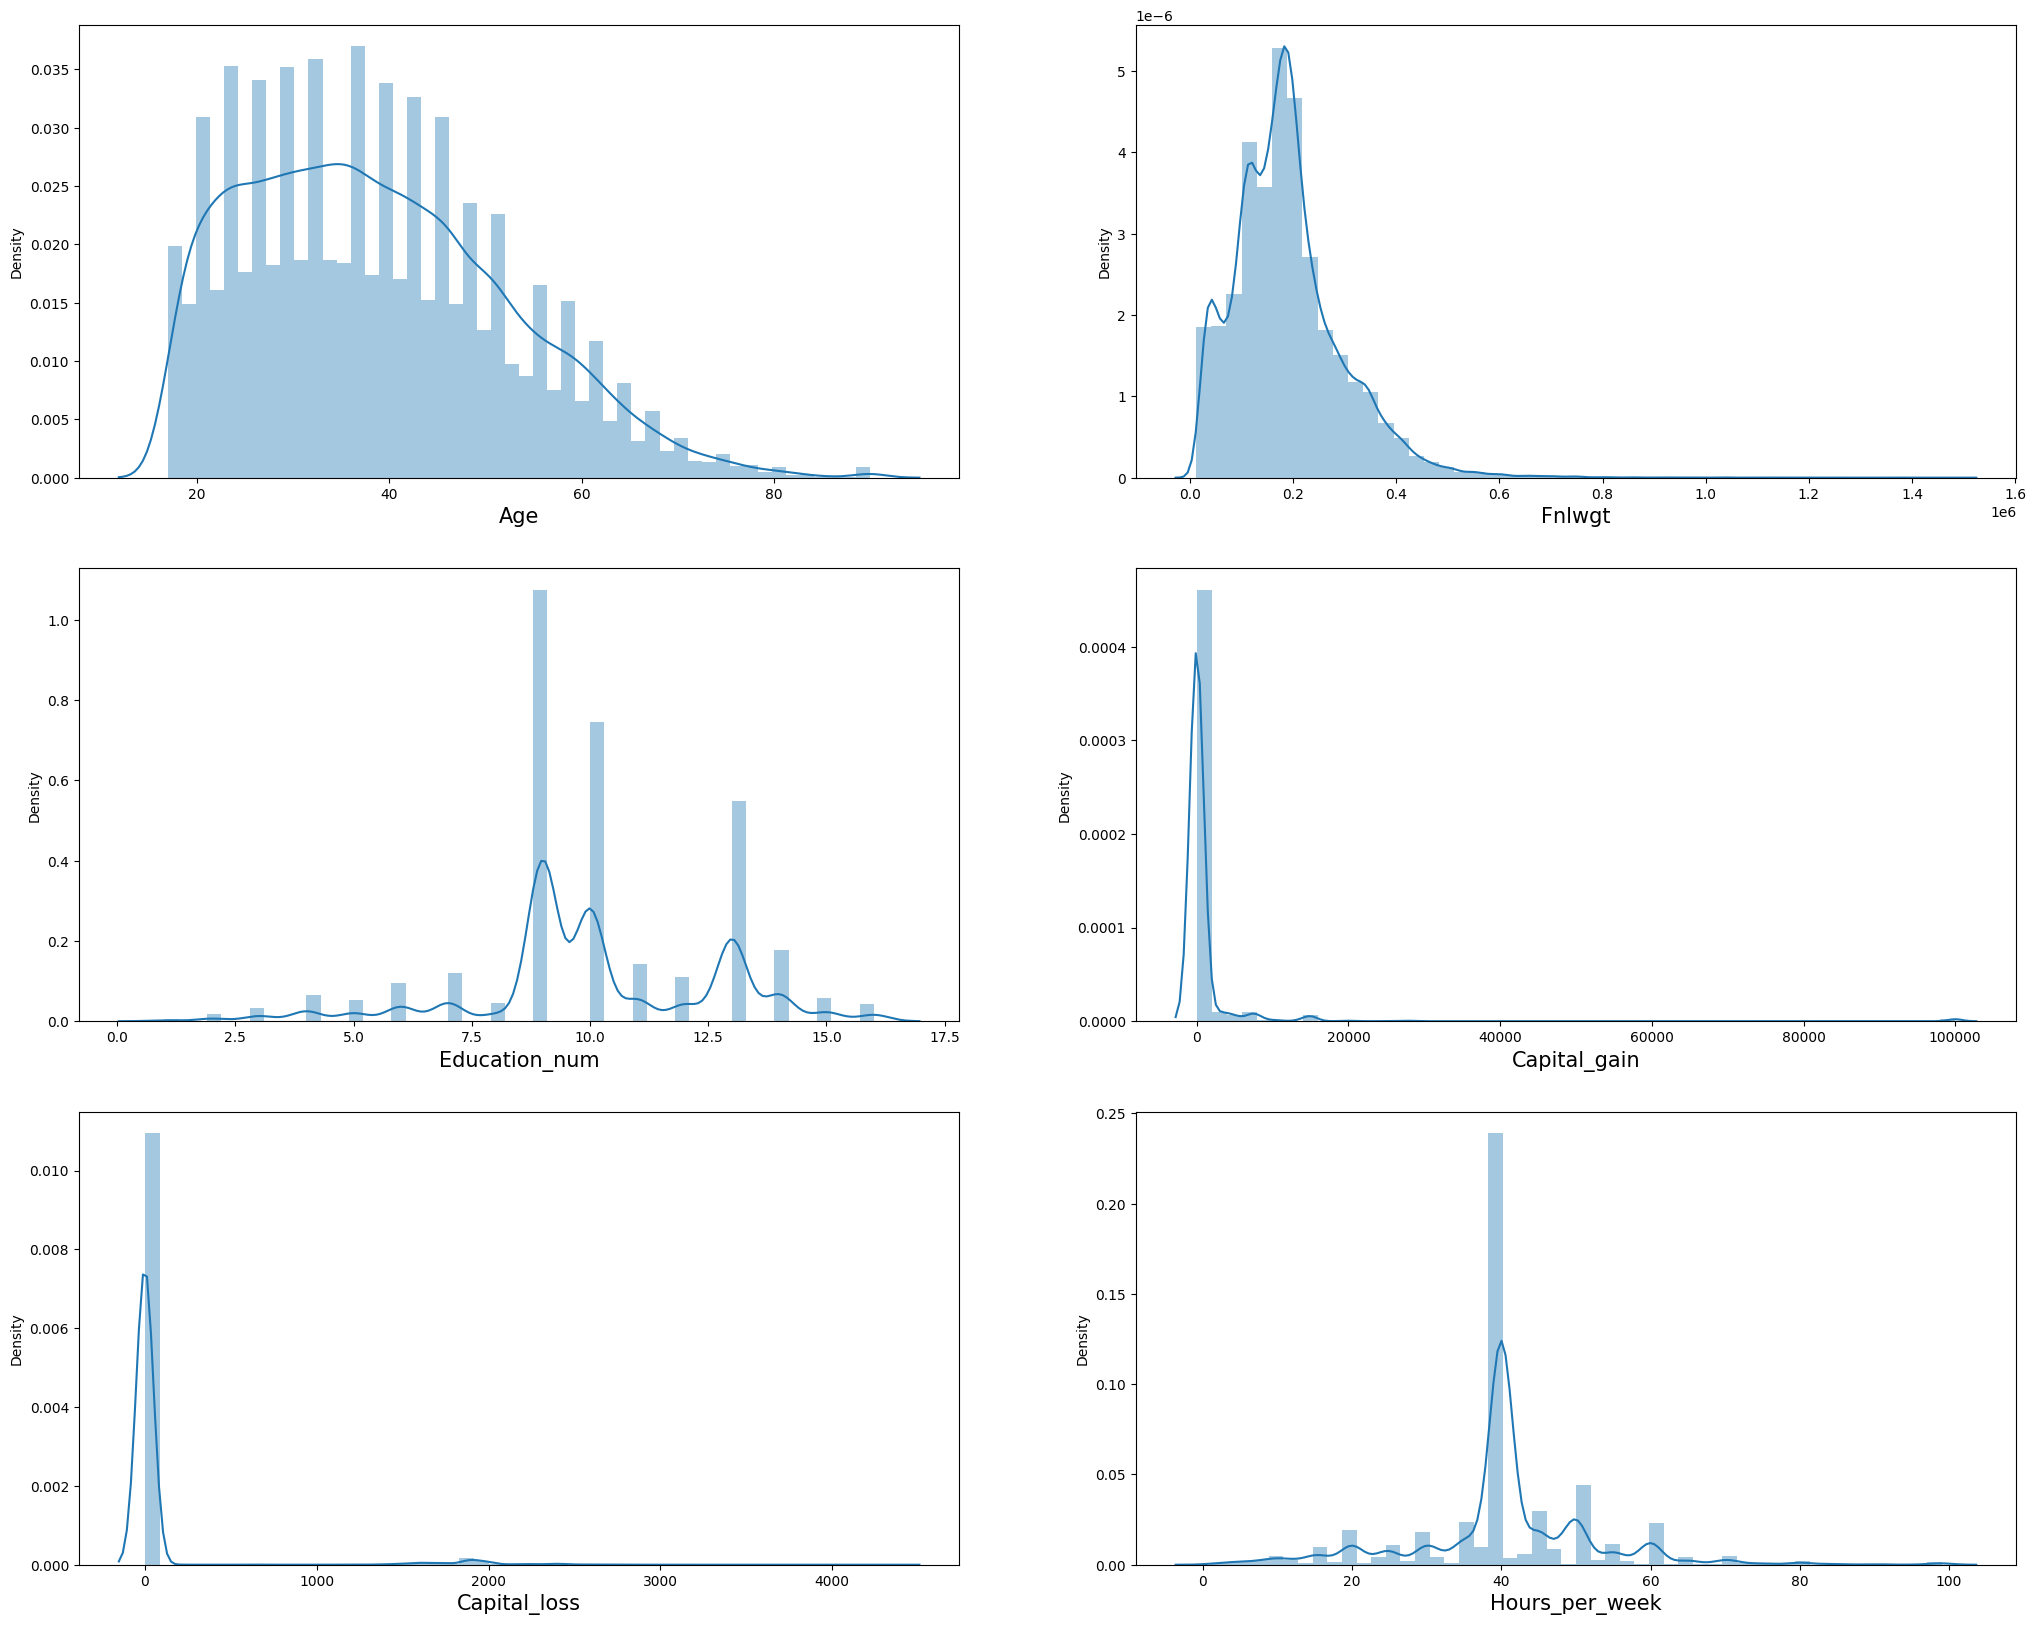

In [124]:
nums_col = census_data[['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']]

plt.figure(figsize=(25,20))
graph = 1

for column in nums_col:
  if graph<=6:
    plt.subplot(3,2,graph)
    ax=sns.distplot(nums_col[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

**Insights from above chart:**

* The 'Age' attribute shows a moderately right-skewed distribution, indicating that a larger number of individuals tend to be younger, with a few outliers in the older age groups.
*This attribute exhibits a substantially right-skewed distribution, suggesting a concentration of weights towards lower values with a few significantly higher values, possibly signifying specific population groups.
* 'Education_num' demonstrates a moderately right-skewed distribution, implying that more individuals tend to have lower numeric representations for education (likely higher education levels corresponding to lower numeric values).
* The 'Capital_gain' attribute shows a substantially right-skewed distribution, indicating that most individuals have minimal capital gains, while a few have significantly higher gains.Similar to capital gains, 'Capital_loss' displays a substantially right-skewed distribution, signifying that most individuals experience minimal losses, with a few encountering notably higher losses.
* 'Hours_per_week' exhibits a moderately left-skewed distribution, suggesting that the majority of individuals work a standard number of hours per week, with fewer individuals working substantially more hours per week.

**'Capital_gain' and 'Capital_loss' have high and very high  skewness, respectively.**

In [125]:
# Using yeojohnson method for resucing skewness

from scipy.stats import zscore, yeojohnson

# List of the columns to be transformed
columns_to_transform = ['Capital_gain', 'Capital_loss']

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform:
    transformed_data, lambda_value = yeojohnson(no_outliers[column] + 1)
    no_outliers[column] = transformed_data


# will check skewness of updated columns

no_outliers[columns_to_transform].skew()

Capital_gain    3.072803
Capital_loss    0.000000
dtype: float64

### Heatmap and Correlation Matrix

                     Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.032951 -0.074430  -0.007864       0.041431   
Workclass       0.032951   1.000000 -0.022991   0.003432      -0.000674   
Fnlwgt         -0.074430  -0.022991  1.000000  -0.021322      -0.037725   
Education      -0.007864   0.003432 -0.021322   1.000000       0.349672   
Education_num   0.041431  -0.000674 -0.037725   0.349672       1.000000   
Marital_status -0.285335  -0.016093  0.029000  -0.035075      -0.059092   
Occupation     -0.002594   0.008216 -0.002200  -0.041907       0.069639   
Relationship   -0.266802  -0.057609  0.008349  -0.010888      -0.096694   
Race            0.027937   0.045442 -0.010514   0.015261       0.028587   
Sex             0.086589   0.068831  0.028520  -0.029446       0.009276   
Capital_gain    0.121386   0.003633 -0.005712   0.016599       0.105267   
Capital_loss    0.019744  -0.010198  0.000517  -0.001575       0.008890   
Hours_per_week  0.091817 

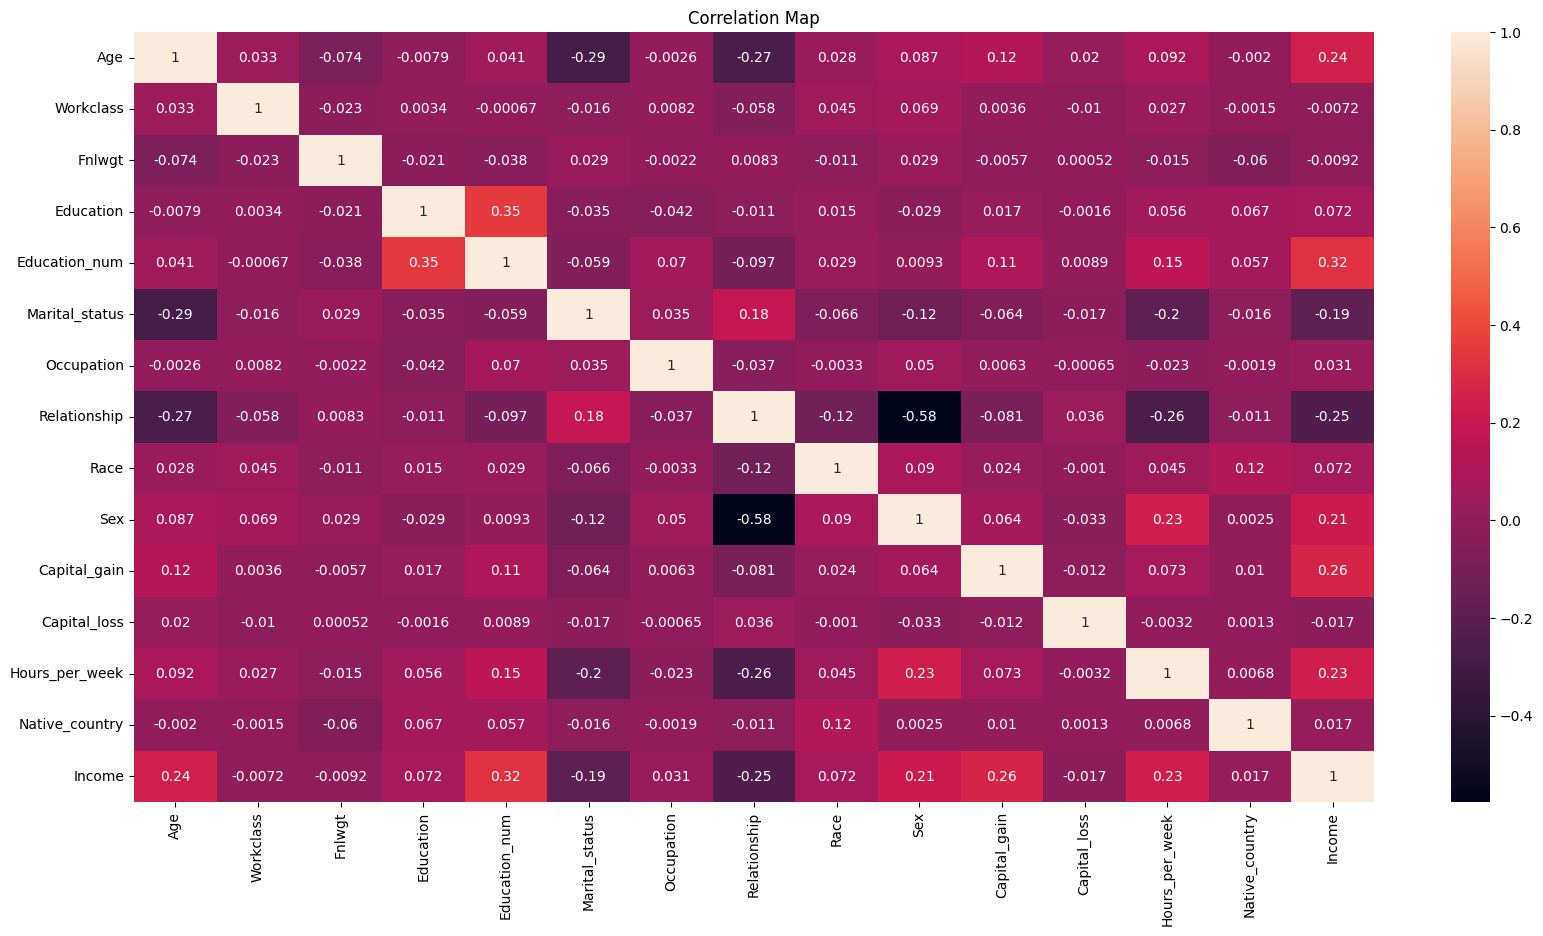

In [126]:
correlation_data = no_outliers

correlation_matrix = correlation_data.corr()

print(correlation_matrix)

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

**Insights from Heatmap:**

* Age: Strongly positively correlated with 'Hours_per_week', weak to moderate correlations with other attributes.

* Workclass: Weak correlations with most attributes like 'Education_num', 'Marital_status', and others.

* Fnlwgt (Final Weight): Displays weak correlations with most attributes including 'Age', 'Education', 'Capital_gain', and others.

* Education: Exhibits weak to moderate correlations with various attributes such as 'Education_num', 'Marital_status', and others.

* Education_num: Strongly positively correlated with 'Hours_per_week', weak to moderate correlations with other columns.

* Marital_status: Shows weak correlations with most attributes including 'Age', 'Education', 'Capital_gain', and others.

* Occupation: Displays weak correlations with most attributes like 'Marital_status', 'Relationship', 'Capital_gain', and others.

* Relationship: Strongly negatively correlated with 'Sex', weak to moderate correlations with other attributes.

* Race: Shows weak correlations with most attributes like 'Sex', 'Capital_gain', 'Hours_per_week', and others.

* Sex: Strongly negatively correlated with 'Relationship', weak to moderate correlations with other attributes.

* Capital_gain: Strongly positively correlated with 'Education_num', weak to moderate correlations with other attributes.

* Capital_loss: Weak correlations with most attributes including 'Fnlwgt', 'Occupation', 'Native_country', and others.

* Hours_per_week: Strongly positively correlated with 'Age', weak to moderate correlations with other attributes.

* Native_country: Displays weak correlations with most attributes including 'Education', 'Marital_status', 'Capital_loss', and others.

* Income: Strongly positively correlated with 'Education_num', weak to moderate correlations with other attributes.

### To check VIF, will define feature and target Variables

In [131]:
x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.176163,Age
1,1.007951,Workclass
2,1.012358,Fnlwgt
3,1.150725,Education
4,1.194837,Education_num
5,1.137077,Marital_status
6,1.016047,Occupation
7,1.671603,Relationship
8,1.032114,Race
9,1.549800,Sex


**The VIF values for all the features fall within a range that is below 5.**

In [132]:
# will check for class inbalance

x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']

y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

### **There is imbalance in dataset, will use SMOTE method to minimize class imbalnce in target varibale**

In [133]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x, y = smote.fit_resample(x,y)

y.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

## **All EDA, Feature selection and class imbalance done, will now built ML model**

### ML Model - 1

#### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math

# Defining x and y variable

x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=50)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predicting on test set results
y_pred = log_reg.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(log_reg, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Logistic Regression after hypertuning model :",grid_search_cv.best_score_*100)

Logistic Regression
Accuracy score: 81.46036005814604
Classifiction report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6876
           1       0.67      0.39      0.49      2067

    accuracy                           0.81      8943
   macro avg       0.75      0.66      0.69      8943
weighted avg       0.80      0.81      0.80      8943

Confusion matrix:
 [[6488  388]
 [1270  797]]




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Cross Validation Scores: [75.89734988 79.40288494 75.96444146 77.68830733 75.9100822 ]




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

Best Parameters for hypertuning Parameters : {'C': 1, 'max_iter': 400, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for Logistic Regression after hypertuning model : 82.4155283968368


**Insights from Logistic Regression Model:**
* The model achieves an accuracy score of approximately 81.46%
* Class 0 (Label 0) has higher precision, recall, and F1-score, indicating better performance in correctly predicting this class.
* Class 1 (Label 1) has notably lower precision, recall, and F1-score compared to Class 0, especially noticeable in recall.
* The model predicts Class 0 relatively well (6488 true negatives), but it struggles more with Class 1 predictions (1270 false negatives).
* Scores vary around the 75-79% range, suggesting consistency in performance, but a moderate level of variability.
* The best hyperparameters for the Logistic Regression after hyperparameter tuning indicate certain settings that maximize performance based on the given dataset

### ML Model - 2

#### K Neighbors Classifier

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Predicting on test set results
y_pred = knn_classifier.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("K Neighbors Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(knn_classifier, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_knn = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 25, 30],
    'p': [1, 2]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for K Neighbors Classifier after hypertuning model :",grid_search_cv.best_score_*100)

K Neighbors Classifier
Accuracy score: 83.19355920831936
Classifiction report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      7049
           1       0.61      0.58      0.59      1894

    accuracy                           0.83      8943
   macro avg       0.75      0.74      0.74      8943
weighted avg       0.83      0.83      0.83      8943

Confusion matrix:
 [[6337  712]
 [ 791 1103]]




Cross Validation Scores: [74.42133512 74.62260986 74.08587722 73.76279148 74.3834927 ]


Best Parameters for hypertuning Parameters : {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Score for K Neighbors Classifier after hypertuning model : 83.53223100886652


**Insights from K Neighbors Classifier:**
* The model achieves an accuracy score of approximately 83.19%
* Class 0 (Label 0) has higher precision, recall, and F1-score compared to Class 1 (Label 1).Class 1 (Label 1) has lower precision, recall, and F1-score compared to Class 0 (Label 0), indicating the model's difficulty in accurately predicting this class.
* Higher misclassifications are observed for Class 1 (Label 1), where 791 instances were incorrectly classified as Class 0.
* The best hyperparameters for the K Neighbors Classifier after hyperparameter tuning indicate specific settings that maximize performance
* algorithm: ball_tree, leaf_size: 20, n_neighbors: 9, p: 1, weights: uniform

### ML Model - 3

#### SVC

In [138]:
from sklearn.svm import SVC

# Defining x and y variable

x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

# Predicting on test set results
y_pred = svc_classifier.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("SVC classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(svc_classifier, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['auto'],
    'degree': [3, 4]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(SVC(), param_grid=param_grid_svc, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for SVC Classifier after hypertuning model :",grid_search_cv.best_score_*100)

SVC classifier
Accuracy score: 84.4459353684446
Classifiction report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      7049
           1       0.68      0.49      0.57      1894

    accuracy                           0.84      8943
   macro avg       0.78      0.72      0.74      8943
weighted avg       0.83      0.84      0.83      8943

Confusion matrix:
 [[6618  431]
 [ 960  934]]




Cross Validation Scores: [77.69204965 77.67527675 77.67527675 77.68830733 77.68830733]


Best Parameters for hypertuning Parameters : {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
Best Score for SVC Classifier after hypertuning model : 81.11670261202973


**Insights from SVC Model:**
* The model achieves an accuracy score of approximately 84.45%
* Precision reflects the model's ability to correctly identify positive instances (Label 1).Recall measures the model's ability to capture all positive instances.Class 1 (Label 1) shows lower precision, recall, and F1-score compared to Class 0 (Label 0), indicating that the model is better at predicting Label 0.
* Higher misclassifications occur in predicting Label 1 (false negatives), with 960 instances incorrectly classified as Label 0.
* Scores are relatively consistent across different folds but are lower compared to the accuracy score, indicating potential overfitting.
* The best hyperparameters for the SVC after hyperparameter tuning indicate certain settings that maximize performance C: 10, degree: 3, gamma: auto, kernel: linear

### ML Model - 4

#### Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
Decision_tress = DecisionTreeClassifier()
Decision_tress.fit(x_train, y_train)

# Predicting on test set results
y_pred = Decision_tress.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Decision Tree Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(Decision_tress, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Decision Tree Classifier
Accuracy score: 80.06261880800626
Classifiction report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      7049
           1       0.53      0.58      0.55      1894

    accuracy                           0.80      8943
   macro avg       0.71      0.72      0.71      8943
weighted avg       0.81      0.80      0.80      8943

Confusion matrix:
 [[6057  992]
 [ 791 1103]]




Cross Validation Scores: [80.24152969 79.1848373  80.82858101 80.875692   79.76849522]


Best Parameters for hypertuning Parameters : {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score for Decision Tree Classifier after hypertuning model : 84.7112389168464


**Insights from Decision Tree Classifier:**

* The model achieves an accuracy score of approximately 80.06%.
* Recall measures the model's ability to capture all instances of a class.
* Precision reflects the model's ability to correctly identify instances of a class. Class 0 (Label 0) shows higher precision, recall, and F1-score compared to Class 1 (Label 1), indicating better performance in predicting Label 0.
* The scores are relatively consistent, indicating stable performance across different splits, but the accuracy score remains around 80%.
* The best hyperparameters for the Decision Tree Classifier after hyperparameter tuning suggest certain settings that maximize performance criterion: entropy, max_depth: 10, max_features: log2, min_samples_leaf: 4, min_samples_split: 2


### ML Model - 5

#### Random Forest Classifier

In [140]:
from sklearn.ensemble import RandomForestClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train, y_train)

# Predicting on test set results
y_pred = rand_forest.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(rand_forest, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_rf = {
    'n_estimators': [50, 100],
    'criterion': ['gini'],
    'max_depth': [None,10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Random Forest Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Random Forest Classifier
Accuracy score: 85.7430392485743
Classifiction report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      7049
           1       0.69      0.60      0.64      1894

    accuracy                           0.86      8943
   macro avg       0.79      0.76      0.78      8943
weighted avg       0.85      0.86      0.85      8943

Confusion matrix:
 [[6538  511]
 [ 764 1130]]




Cross Validation Scores: [84.50184502 84.5521637  85.17276082 85.43868478 84.7005536 ]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters for hypertuning Parameters : {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score for Random Forest Classifier after hypertuning model : 86.09633357296909


**Insights from Random Forest Classifier:**
* The model achieves an accuracy score of approximately 85.74%
* Class 0 has higher precision, recall, and F1-score compared to Class 1.Class 0 has higher precision, recall, and F1-score compared to Class 1.
* There's a considerable number of false negatives (Type II errors) for Class 1, indicating instances incorrectly classified as Class 0.
* The best hyperparameters for the Random Forest Classifier after hyperparameter tuning maximize model performance. criterion: gini, max_depth: 15, max_features: auto, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100

### ML Model - 6

#### Gradient Boosting Classifier

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
gboost = GradientBoostingClassifier()
gboost.fit(x_train, y_train)

# Predicting on test set results
y_pred = gboost.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Gradient Boosting Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(gboost, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_gb = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Gradient Boosting Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Gradient Boosting Classifier
Accuracy score: 86.93950575869394
Classifiction report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      7049
           1       0.75      0.58      0.65      1894

    accuracy                           0.87      8943
   macro avg       0.82      0.76      0.79      8943
weighted avg       0.86      0.87      0.86      8943

Confusion matrix:
 [[6681  368]
 [ 800 1094]]




Cross Validation Scores: [85.15598792 85.60885609 86.12881583 86.47877873 85.90840463]


Best Parameters for hypertuning Parameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score for Gradient Boosting Classifier after hypertuning model : 86.75772825305536


**Insights from Gradient Boosting Classifier:**
* The model achieves an accuracy score of approximately 86.94%.
* Class 0 (Label 0) has good precision, recall, and F1-score.Class 1 (Label 1) has lower precision, recall, and F1-score compared to Class 0, particularly noticeable in recall and F1-score.Recall measures the model's ability to capture all instances of a class.
* Class 1 (Label 1) has relatively higher misclassifications, particularly with a higher number of false negatives (800 instances predicted as 0 while they belong to class 1).


### ML Model - 7

#### Extra Trees Classifier

In [142]:
from sklearn.ensemble import ExtraTreesClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['Income'])
y = no_outliers['Income']


# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
extra_tree = ExtraTreesClassifier()
extra_tree.fit(x_train, y_train)

# Predicting on test set results
y_pred = extra_tree.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Extra Trees Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(extra_tree, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_et = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid=param_grid_et, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Extra Trees Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Extra Trees Classifier
Accuracy score: 84.66957396846696
Classifiction report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      7049
           1       0.66      0.58      0.62      1894

    accuracy                           0.85      8943
   macro avg       0.77      0.75      0.76      8943
weighted avg       0.84      0.85      0.84      8943

Confusion matrix:
 [[6471  578]
 [ 793 1101]]




Cross Validation Scores: [83.83092922 83.59610869 84.2167058  84.93541352 84.21405804]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters for hypertuning Parameters : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Extra Trees Classifier after hypertuning model : 85.24323028995926


**Insights from Extra Trees Classifier:**
* The model achieves an accuracy score of approximately 84.67%
* Class 0 (Label 0) shows higher precision, recall, and F1-score compared to Class 1 (Label 1).F1-score is the harmonic mean of precision and recall.Precision measures the correctness of the predicted labels.
* The model tends to misclassify instances more often for Class 1 compared to Class 0, as indicated by the higher false negative count (793) for Class 1.
* Scores are relatively consistent, indicating stability in performance across multiple splits

---
# **Conclusion**
---

## **The model that seems to have the best performance, considering both accuracy and F1-score for class 1, is the Gradient Boosting Classifier. With an accuracy of 86.94% and an F1-score of 0.65 for class 1, it demonstrates a relatively balanced performance between accuracy and precision in identifying class 1 instances.**

### Saving Model 'income_best_model'



In [143]:
# Saving the best model 'Income_best_model'

import pickle

# Save the model to a file
with open('income_best_model.pkl', 'wb') as file:
    pickle.dump(gboost, file)


# Load the saved model from file
with open('income_best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)